<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [438]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')

In [0]:
data_train = df_train.values
data_test = df_test.values

Xtrain = data_train[:,1:]
Ytrain = data_train[:,0]

Xtest = data_test[:,1:]
Ytest = data_test[:,0]

In [0]:
N, D = Xtrain.shape
K = len(set(Ytrain))
M = 128

In [0]:
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  ind=np.zeros((N,K))
  for L in range(N):
    ind[L,Y[L]]=1
  
  return ind

In [0]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

In [0]:
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)

W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

In [0]:
def gradW2(Z, pY, T):
  return Z.T.dot(pY - T)

def gradb2(pY, T):
  return (pY - T).sum(axis = 0)

def gradW1(X, W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return X.T.dot(dZ)

def gradb1(W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return dZ.sum(axis = 0)

In [0]:
def forward(X, W1, b1, W2, b2):
  Z = X.dot(W1) + b1
  Z[Z < 0] = 0				# relu
  
  A = Z.dot(W2) + b2
  expA = np.exp(A)
  pY = expA / expA.sum(axis=1, keepdims=True)
  
  return Z, pY

In [0]:
def cost(pY, Y):
	return -(Y * np.log(pY)).sum()

In [0]:
def error_rate(pY, Y):
  return np.mean(Y != np.argmax(pY, axis=1))

Epoch 1 : cost = 652766.00901748 error rate = 0.7831
Epoch 1 : cost = 633124.5733478082 error rate = 0.7454


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Epoch 1 : cost = nan error rate = 0.6946
Epoch 1 : cost = 570612.8826561443 error rate = 0.597
Epoch 1 : cost = 505665.6838994408 error rate = 0.6303
Epoch 1 : cost = 260333.84458167915 error rate = 0.5812
Epoch 1 : cost = 192403.5720744827 error rate = 0.4017
Epoch 1 : cost = 228074.87100059423 error rate = 0.4923
Epoch 1 : cost = 166972.7575405586 error rate = 0.4549
Epoch 1 : cost = 137284.09856518934 error rate = 0.4878
Epoch 1 : cost = 108486.20333963395 error rate = 0.5029
Epoch 1 : cost = 101943.8147124587 error rate = 0.5208
Epoch 1 : cost = 76888.64003195614 error rate = 0.479
Epoch 1 : cost = 55133.8898797769 error rate = 0.4094
Epoch 1 : cost = 43114.68543109506 error rate = 0.3638
Epoch 1 : cost = 35776.28957694657 error rate = 0.3805
Epoch 1 : cost = 35414.33780017189 error rate = 0.4294
Epoch 1 : cost = 32279.44863016403 error rate = 0.4523
Epoch 1 : cost = 27964.159645538417 error rate = 0.4616
Epoch 1 : cost = 25207.824125388703 error rate = 0.4714
Epoch 1 : cost = 2395

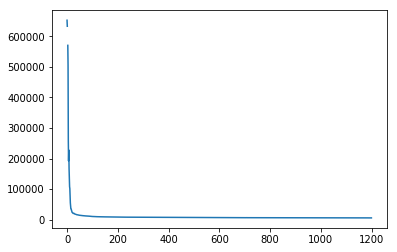

Elapsted time for 10 epoches: 0:02:25.231851


In [449]:
lr = 0.00000035
reg = 0.001
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
training_epochs = 10
batch_sz = 500
n_batches = N // batch_sz
costs = []
t0 = datetime.now()

for epoch in range(training_epochs):
  for j in range(n_batches):
    Xbatch = Xtrain[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    Ybatch = Ytrain_ind[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    
    Z, pY = forward(Xbatch, W1, b1, W2, b2)

    gW2 = (gradW2(Z, pY, Ybatch) + reg*W2)
    gb2 = (gradb2(pY, Ybatch) + reg*b2)
    gW1 = (gradW1(Xbatch, W2, Z, pY, Ybatch) + reg*W1)
    gb1 = (gradb1(W2, Z, pY, Ybatch) + reg*b1)
    
		# update velocities
    dW2 = mu*dW2 - lr*gW2
    db2 = mu*db2 - lr*gb2
    dW1 = mu*dW1 - lr*gW1
    db1 = mu*db1 - lr*gb1
    
    # updates
    W2 += dW2
    b2 += db2
    W1 += dW1
    b1 += db1
    
    if j % 1 == 0:
      _,pY_test = forward(Xtest, W1, b1, W2, b2)
      c = cost(pY_test, Ytest_ind)
      costs.append(c)
      e = error_rate(pY_test, Ytest)
      print("Epoch", (epoch + 1), ": cost =", c, "error rate =", e)
      
plt.plot(costs, label="cost")
plt.show()

print("Elapsted time for 10 epoches:", datetime.now() - t0)